Import dan Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

Load Dataset

In [2]:
graded_csv = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(graded_csv)
df.head()

,filename,area_cm2,width_cm,height_cm,weight_est_g,texture_score,hue_mean,area_norm,weight_norm,texture_norm,grade_score,grade_label,label_asli
0,A_001.jpg,134.9231,14.832,12.274,830.656,0.010416,0.502567,0.566154,1.0,0.20832,69.449116,A,A
1,A_002.jpg,138.0154,13.429,13.729,852.587,0.009911,0.499815,0.586769,1.0,0.19822,66.639694,A,A
2,A_003.jpg,129.0906,14.956,12.821,789.498,0.019591,0.523577,0.527271,1.0,0.39182,70.918652,A,A
3,A_004.jpg,138.7851,13.712,13.094,858.058,0.015068,0.487776,0.591901,1.0,0.30136,73.661727,A,A
4,A_005.jpg,139.7328,13.738,13.147,864.799,0.015436,0.489283,0.598219,1.0,0.30872,73.034244,A,A


Evaluasi Akurasi & Confusion Matrix

===== EVALUASI HASIL GRADING =====
Akurasi : 0.6211031175059952

Confusion Matrix:
 [[109  32   0]
 [119  18   6]
 [  0   1 132]]

Classification Report:
               precision    recall  f1-score   support

           A       0.48      0.77      0.59       141
           B       0.35      0.13      0.19       143
           C       0.96      0.99      0.97       133

    accuracy                           0.62       417
   macro avg       0.60      0.63      0.58       417
weighted avg       0.59      0.62      0.57       417



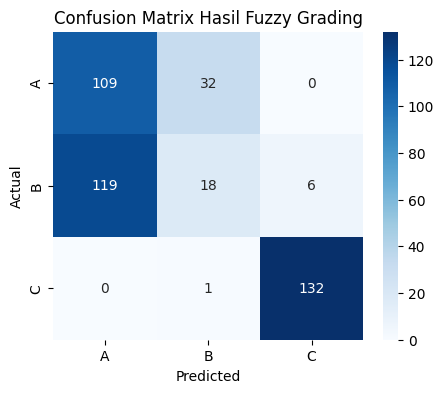

In [3]:
y_true = df['label_asli']
y_pred = df['grade_label']

print("===== EVALUASI HASIL GRADING =====")
print("Akurasi :", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=['A', 'B', 'C'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C'], yticklabels=['A', 'B', 'C'])
plt.title("Confusion Matrix Hasil Fuzzy Grading")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Distribusi Grade

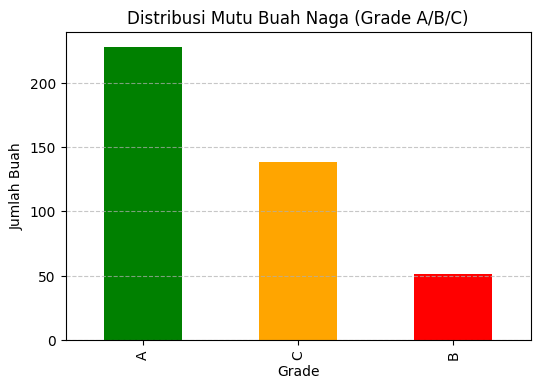

In [4]:
plt.figure(figsize=(6, 4))
df['grade_label'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribusi Mutu Buah Naga (Grade A/B/C)")
plt.xlabel("Grade")
plt.ylabel("Jumlah Buah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualisasi Sebaran Fitur

In [5]:
sns.scatterplot(data=df, x='area', y='weight_est', hue='grade_label', palette='Set1', s=60)
plt.title("Sebaran Ukuran vs Berat Berdasarkan Grade")
plt.xlabel("Area (Ukuran)")
plt.ylabel("Estimasi Berat")
plt.legend(title="Grade")
plt.show()

ValueError: Could not interpret value `area` for `x`. An entry with this name does not appear in `data`.

Tampilkan Beberapa Gambar Contoh

In [12]:
SEGMENTED_DIR = r"E:\DragonEye\dataset\segmented"

# Filter DataFrame untuk masing-masing grade dan ambil satu sampel untuk tiap grade
samples_A = df[df['grade_label'] == 'A'].sample(n=1)
samples_B = df[df['grade_label'] == 'B'].sample(n=1)
samples_C = df[df['grade_label'] == 'C'].sample(n=1)

# Gabungkan sampel dari ketiga grade
samples = pd.concat([samples_A, samples_B, samples_C])

# Plotting gambar
plt.figure(figsize=(12, 4))
for i, (_, row) in enumerate(samples.iterrows()):
    img_path = os.path.join(SEGMENTED_DIR, row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah BGR ke RGB untuk tampilan yang benar
        plt.subplot(1, 3, i + 1)  # Menyusun 3 gambar dalam 1 baris
        plt.imshow(img)
        plt.title(f"{row['filename']}\nGrade: {row['grade_label']}")
        plt.axis('off')
plt.show()

ValueError: a must be greater than 0 unless no samples are taken